
--- EXPENSE TRACKER ---
1. Add Expense
2. View Expenses
3. Category Totals
4. Show Chart
5. Exit


Choose an option:  1
Enter amount:  4000
Enter category (Food, Travel, etc.):  travel
Enter note (optional):  


✅ Expense added successfully!

--- EXPENSE TRACKER ---
1. Add Expense
2. View Expenses
3. Category Totals
4. Show Chart
5. Exit


Choose an option:  1
Enter amount:  2000
Enter category (Food, Travel, etc.):  food
Enter note (optional):  


✅ Expense added successfully!

--- EXPENSE TRACKER ---
1. Add Expense
2. View Expenses
3. Category Totals
4. Show Chart
5. Exit


Choose an option:  2



--- All Expenses ---
2026-02-11 | ₹5200.0 | Food | 
2026-02-11 | ₹2000.0 | Travel | 
2026-02-11 | ₹5200.0 | Food | 2600
2026-02-11 | ₹2900.0 | Travel | 
2026-02-11 | ₹900.0 | Groceries | 
2026-02-17 | ₹500.0 | 500 | h
2026-02-17 | ₹4000.0 | travel | 
2026-02-17 | ₹2000.0 | food | 

--- EXPENSE TRACKER ---
1. Add Expense
2. View Expenses
3. Category Totals
4. Show Chart
5. Exit


Choose an option:  4



--- Category Totals ---
Food: ₹10400.0
Travel: ₹4900.0
Groceries: ₹900.0
500: ₹500.0
travel: ₹4000.0
food: ₹2000.0


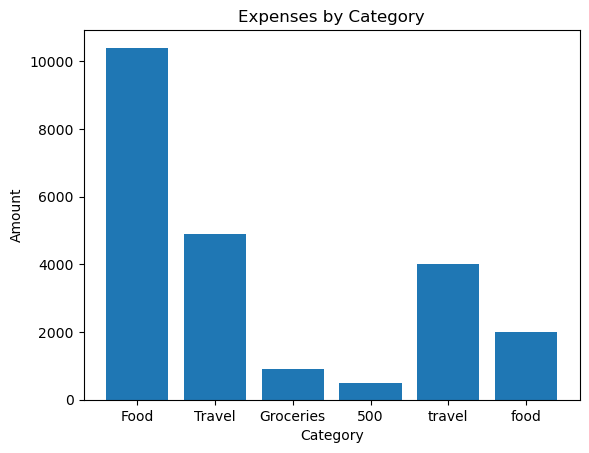


--- EXPENSE TRACKER ---
1. Add Expense
2. View Expenses
3. Category Totals
4. Show Chart
5. Exit


Choose an option:  55


❌ Invalid choice

--- EXPENSE TRACKER ---
1. Add Expense
2. View Expenses
3. Category Totals
4. Show Chart
5. Exit


Choose an option:  55


❌ Invalid choice

--- EXPENSE TRACKER ---
1. Add Expense
2. View Expenses
3. Category Totals
4. Show Chart
5. Exit


Choose an option:  5


👋 Exiting... Bye!


In [7]:
import csv
import datetime
import matplotlib.pyplot as plt



expenses = []
FILE_NAME = "expenses.csv"


def load_expenses():
    try:
        with open(FILE_NAME, "r") as file:
            reader = csv.DictReader(file)
            for row in reader:
                row["amount"] = float(row["amount"])
                expenses.append(row)
    except FileNotFoundError:
        pass



def save_expenses():
    with open(FILE_NAME, "w", newline="") as file:
        fieldnames = ["date", "amount", "category", "note"]
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for expense in expenses:
            writer.writerow(expense)



def add_expense():
    date = datetime.date.today().isoformat()
    amount = float(input("Enter amount: "))
    category = input("Enter category (Food, Travel, etc.): ")
    note = input("Enter note (optional): ")

    expense = {
        "date": date,
        "amount": amount,
        "category": category,
        "note": note
    }

    expenses.append(expense)
    save_expenses()
    print("✅ Expense added successfully!")



def view_expenses():
    if not expenses:
        print("No expenses found.")
        return

    print("\n--- All Expenses ---")
    for e in expenses:
        print(f"{e['date']} | ₹{e['amount']} | {e['category']} | {e['note']}")


def category_totals():
    totals = {}

    for e in expenses:
        category = e["category"]
        totals[category] = totals.get(category, 0) + e["amount"]

    print("\n--- Category Totals ---")
    for cat, amt in totals.items():
        print(f"{cat}: ₹{amt}")

    return totals


def show_chart():
    totals = category_totals()

    if not totals:
        return

    categories = list(totals.keys())
    amounts = list(totals.values())

    plt.bar(categories, amounts)
    plt.xlabel("Category")
    plt.ylabel("Amount")
    plt.title("Expenses by Category")
    plt.show()

def menu():
    while True:
        print("\n--- EXPENSE TRACKER ---")
        print("1. Add Expense")
        print("2. View Expenses")
        print("3. Category Totals")
        print("4. Show Chart")
        print("5. Exit")

        choice = input("Choose an option: ")

        if choice == "1":
            add_expense()
        elif choice == "2":
            view_expenses()
        elif choice == "3":
            category_totals()
        elif choice == "4":
            show_chart()
        elif choice == "5":
            print("Exiting... Bye!")
            break
        else:
            print("Invalid choice")

load_expenses()
menu()